<h1>Hello World of Deep Learning</h1>

In [1]:
#For getting the mnist handwritten dataset
from keras.datasets import mnist

#We will be using the methods present inside the ImageDataGenerator class to feed our MNIST data to the NN
from keras.preprocessing.image import ImageDataGenerator

#Importing pyplot for data visualization
import matplotlib.pyplot as plt
#Setting matplotlib as inline will display the corresponding graph below the cell itself
%matplotlib inline

#import
import random

#Importing DL libraries
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras.models import Sequential

from keras.utils import np_utils

Using TensorFlow backend.


In [62]:
#Loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Before we push our data to the Neural network, let us visualize it

In [63]:
print(f"x_train shape: {x_train.shape}\t\ty_train.shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}\t\ty_test.shape: {y_test.shape}")


x_train shape: (60000, 28, 28)		y_train.shape: (60000,)
x_test shape: (10000, 28, 28)		y_test.shape: (10000,)


<p>It's clear that the Numpy array 'x_train' returned by the function load_data has the shape (m_training examples, image rows, image_cols)</p>

Let us see some sample images

'fig = plt.figure()\nfor i in range(9):\n    plt.subplot(3,3,i+1)\n    plt.tight_layout()\n    plt.imshow(x_train[i], cmap=\'gray\', interpolation=\'none\')\n    plt.title = f"{y_train[i]}"\n    plt.xticks([])\n    plt.yticks([])'

<Figure size 432x288 with 0 Axes>

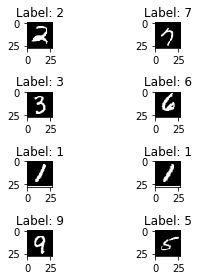

In [64]:
#Making a pyplot figure
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(4,2) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(4):
    for j in range(2):
        num = random.randint(0,500)
        axarr[i][j].imshow(x_train[num], cmap='gray', interpolation='none')
        axarr[i][j].set_title(f'Label: {y_train[num]}')
        plt.tight_layout()

"""fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title = f"{y_train[i]}"
    plt.xticks([])
    plt.yticks([])"""

In [65]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
#Data Preprocessing
x_train = x_train/255
x_test= x_test/255

n_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes=n_classes)
y_test = np_utils.to_categorical(y_test, num_classes=n_classes)
num_classes = y_test.shape[1]

print("After reshaping")
print(f"x_train shape: {x_train.shape}\t\ty_train.shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}\t\ty_test.shape: {y_test.shape}")

After reshaping
x_train shape: (60000, 28, 28, 1)		y_train.shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)		y_test.shape: (10000, 10)


In [66]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(28, 28, 1), activation='relu', use_bias=True))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=32, kernel_size=3,activation='relu', use_bias=True))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [67]:
#To reduce the learning rate once the loss reaches a plateau
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [59]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=1, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 22s 365us/step - loss: 0.2885 - accuracy: 0.9154 - val_loss: 0.0931 - val_accuracy: 0.9721
Epoch 2/6
60000/60000 [==============================] - 21s 352us/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.0553 - val_accuracy: 0.9808
Epoch 3/6
60000/60000 [==============================] - 22s 366us/step - loss: 0.0599 - accuracy: 0.9819 - val_loss: 0.0493 - val_accuracy: 0.9829
Epoch 4/6
60000/60000 [==============================] - 29s 491us/step - loss: 0.0488 - accuracy: 0.9853 - val_loss: 0.0442 - val_accuracy: 0.9854
Epoch 5/6
60000/60000 [==============================] - 29s 486us/step - loss: 0.0401 - accuracy: 0.9878 - val_loss: 0.0400 - val_accuracy: 0.9869
Epoch 6/6
60000/60000 [==============================] - 23s 390us/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0577 - val_accuracy: 0.9804


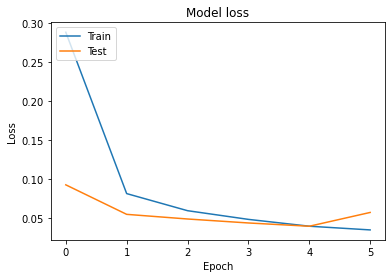

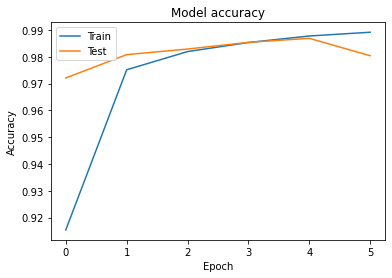

In [60]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Now that our model has been trained, let us predict values


    

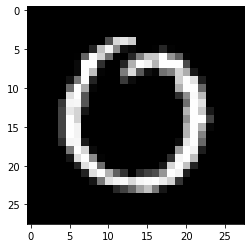

In [77]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(4,2) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(4):
    for j in range(2):
        num = random.randint(0,500)
        output = model.predict()
        axarr[i][j].imshow(x_train[num], cmap='gray', interpolation='none')
        axarr[i][j].set_title(f'Label: {y_train[num]}')
        plt.tight_layout()
    